# Importing libraries

In [1033]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading data

In [1034]:
df = pd.read_csv("Loan_Data.csv")
df.shape

(614, 13)

In [1035]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


# Removing unused data

In [1036]:
df = df.drop("Loan_ID", axis=1)

# Setting the status as index

In [1037]:
df = df.set_index("Loan_Status")

# Applying One Hot Encoding

In [1038]:
df1 = pd.get_dummies(df[["Property_Area", "Dependents"]])
df = pd.concat([df, df1], axis=1)
df.drop(["Dependents", "Property_Area"], axis=1, inplace=True)

## Boolean to Binary convertion

In [1039]:
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

## Yes-No to Binary

In [1040]:
df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})
df["Married"] = df["Married"].replace({"Yes": 1, "No": 0})
df["Education"] = df["Education"].replace({"Graduate": 1, "Not Graduate": 0})
df["Self_Employed"] = df["Self_Employed"].replace({"Yes": 1, "No": 0})
df.head(2)

C:\Users\Haitham\AppData\Local\Temp\ipykernel_12632\3460672002.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})
C:\Users\Haitham\AppData\Local\Temp\ipykernel_12632\3460672002.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Married"] = df["Married"].replace({"Yes": 1, "No": 0})
C:\Users\Haitham\AppData\Local\Temp\ipykernel_12632\3460672002.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain th

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
Loan_Status,,,,,,,,,,,,,,,,
Y,1.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,0,1,1,0,0,0
N,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0,0,0,1,0,0


# Filling missing entries

In [1041]:
df = df.fillna(0)

# Storing max values for late scaling

In [1042]:
ApplicantIncome_max = df["ApplicantIncome"].max()
CoapplicantIncome_max = df["CoapplicantIncome"].max()
LoanAmount_max = df["LoanAmount"].max()
Loan_Amount_Term_max = df["Loan_Amount_Term"].max()

# Scaling data

In [1043]:
df = df.div(df.max())
df.head(1)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
Loan_Status,,,,,,,,,,,,,,,,
Y,1.0,0.0,1.0,0.0,0.07221,0.0,0.0,0.75,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# Converting data to array

In [1044]:
# Data to array (excluding index)
X = df.to_numpy()

# Index to array
y = df.index.to_numpy()

# converting Y to 1 and N to 0
y = np.where(y == "Y", 1, 0)

# shape of the data

In [1045]:
# m is the number of examples
m = X.shape[0]

# n is the number of features
n = X.shape[1]

# Defining the model

In [1046]:
# This represents the sigmoid function, 
# where z is the normal linear regression function and is the input here

def sigmoid(z):

    fx = 1/(1+np.exp(-z))
    return fx

In [1047]:
w = np.zeros(n)
b = 0.

# Cost function

In [1048]:
def cost_function(X, y, w, b, lambda_):

    total_cost = 0
    for i in range(m):
        h = sigmoid(np.dot(X[i], w) + b)
        total_cost += y[i] * np.log(h) + (1 - y[i]) * np.log(1 - h)
    return -total_cost / m

    u = 0
    for j in range(n):
        u += w[j]**2
    
    reg = u*(lambda_/2*m)

    total_cost += reg
    
    return total_cost

# Gradient Descent

In [1049]:
def gradient(X, y, w, b): 

    dj_dw = np.zeros(n)
    dj_db = 0

    
    for i in range(m):
        h = sigmoid(np.dot(X[i], w) + b)
        dj_db += h - y[i]
        
        for j in range(n):
            dj_dw[j] += (h - y[i]) * X[i,j]
    
    
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db 

In [1050]:
def gardient_descent(X, y, w, b, a, num_iters, lambda_):

    j_plot = []
    i_plot = []
    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(num_iters):
        dj_dw, dj_db = gradient(X, y, w, b)

        w_temp = np.copy(w)  # Create a copy of w to store the updated weights

        for j in range(n):
            w_temp[j] -= a * (dj_dw[j]+(lambda_ / m * w[j]))  # Update each weight individually

        b = b - a * dj_db  # Update bias

        w = w_temp  # Assign the updated weights back to w


        
        cost = cost_function(X, y, w, b, lambda_)

        
        j_plot.append(cost)
        i_plot.append(i)

        #print(f"Iteration: {i}, Cost: {cost}, w: {w}, b: {b}")
        
        plt.plot(i_plot, j_plot)
        plt.title("Learning Curve")
        plt.xlabel("Iterations")
        plt.ylabel("Error")

    return w, b, j_plot, i_plot

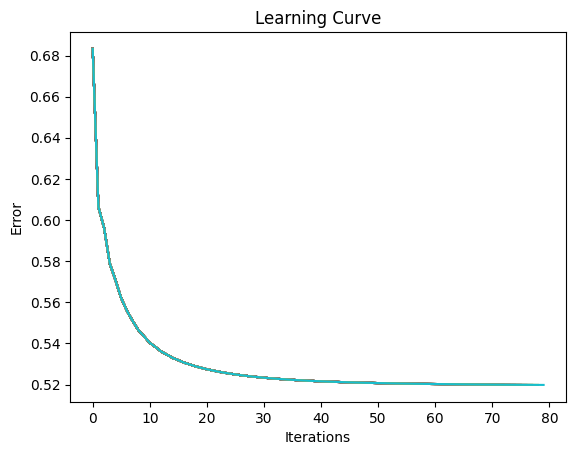

In [1051]:
a = 2
num_iters = 80
lambda_ = 6

w, b, j_plot, i_plot = gardient_descent(X, y, w, b, a, num_iters, lambda_)

In [1052]:
our_m = sigmoid(np.dot(X, w) + b)
our_m_binary = np.empty((m), dtype=object)

for i in range(m):
    if our_m[i] >= 0.5:
        our_m_binary[i] = 1
    else:
        our_m_binary[i] = 0



matching_elements = np.sum(y == our_m_binary)

# Calculate the percentage of accuracy
percentage_equality = (matching_elements / y.size) * 100

print(f"The model is: {percentage_equality.round(2)}% accurate")

The model is: 77.2% accurate


# Prediction mechanism

In [1053]:
def prediction():    
    X_pred = np.zeros(n)
    
    Gender_input = int(input("""Enter your Gender:
        
        Male = 1
        Female = 0
    """))
    X_pred[0] = Gender_input
    
    
    Married_input = int(input("""Enter your Martial Status:
        
        Married = 1
        Not Married = 0
    """))
    X_pred[1] = Married_input
    
    
    Education_input = int(input("""Enter your Education level: 
        
        Graduate = 1
        Not Graduate = 0
    """))
    X_pred[2] = Education_input
    
    
    Employment_input = int(input("""Are you self-employed: 
        
        Yes = 1
        No = 0
    """))
    X_pred[3] = Employment_input
    
    
    ApplicantIncome_input = int(input("""Enter your income amount (monthly): """))
    ApplicantIncome_input = ApplicantIncome_input / ApplicantIncome_max
    X_pred[4] = ApplicantIncome_input
    
    
    CoapplicantIncome_input = int(input("""Enter your Coapplicant's income amount (monthly): """))
    CoapplicantIncome_input = CoapplicantIncome_input / CoapplicantIncome_max
    X_pred[5] = CoapplicantIncome_input
    
    
    LoanAmount_input = int(input("""Enter your loan amount (in thousands): """))
    LoanAmount_input = LoanAmount_input / LoanAmount_max
    X_pred[6] = LoanAmount_input
    
    
    Loan_Amount_Term_input = int(input("""Enter your loan term (in months): """))
    Loan_Amount_Term_input = Loan_Amount_Term_input / Loan_Amount_Term_max
    X_pred[7] = Loan_Amount_Term_input
    
    
    credit_history_input = int(input("""Does the credit history meet guidelines: 
        
        Yes = 1
        No = 0
    """))
    X_pred[8] = credit_history_input
    
    
    Property_Area_input = int(input("""Property Area: 
        
        Rural = 1
        Semiurban = 2
        Urban = 3
    """))
    
    if Property_Area_input == 1:
        X_pred[9] = 1
        X_pred[10] = 0
        X_pred[11] = 0
    elif Property_Area_input == 2:
        X_pred[9] = 0
        X_pred[10] = 1
        X_pred[11] = 0
    elif Property_Area_input == 3:
        X_pred[9] = 0
        X_pred[10] = 0
        X_pred[11] = 1
    else:
        print("Error: Invalid Property Area input")
    
    
    Dependents_input = int(input("""Number of Dependents: 
        
        None = 0
        One = 1
        Two = 2
        Three or more = 3
    """))
    
    if Dependents_input == 0:
        X_pred[12] = 1
        X_pred[13] = 0
        X_pred[14] = 0
        X_pred[15] = 0
    elif Dependents_input == 1:
        X_pred[12] = 0
        X_pred[13] = 1
        X_pred[14] = 0
        X_pred[15] = 0
    elif Dependents_input == 2:
        X_pred[12] = 0
        X_pred[13] = 0
        X_pred[14] = 1
        X_pred[15] = 0
    elif Dependents_input == 3:
        X_pred[12] = 0
        X_pred[13] = 0
        X_pred[14] = 0
        X_pred[15] = 1
    else:
        print("Error: Invalid Dependents input")

    p = sigmoid(np.dot(X_pred, w) + b)
    
    if p >= 0.5:
        print("Eligable Candidate")
    else:
        print("Not Eligable")

    print(f"Eligibility index: {(p*100).round(2)}%")
    
    return

# Make predictions

In [1059]:
prediction()

Enter your Gender:
        
        Male = 1
        Female = 0
     0
Enter your Martial Status:
        
        Married = 1
        Not Married = 0
     0
Enter your Education level: 
        
        Graduate = 1
        Not Graduate = 0
     1
Are you self-employed: 
        
        Yes = 1
        No = 0
     0
Enter your income amount (monthly):  1
Enter your Coapplicant's income amount (monthly):  0
Enter your loan amount (in thousands):  700
Enter your loan term (in months):  1
Does the credit history meet guidelines: 
        
        Yes = 1
        No = 0
     1
Property Area: 
        
        Rural = 1
        Semiurban = 2
        Urban = 3
     3
Number of Dependents: 
        
        None = 0
        One = 1
        Two = 2
        Three or more = 3
     0


Eligable Candidate
Eligibility index: 74.71%
